In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import m_e, e ,c 
from astropy import units as u
from scipy.constants import physical_constants
from scipy.constants import physical_constants, c as cc

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import m_e, e ,c 
from astropy import units as u
from scipy.constants import physical_constants
from scipy.constants import physical_constants, c as cc

C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187  # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value  # cm/s
cc_k = c.to(u.km / u.s).value #km / s
v_th_CIV = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952



def voigt(lambda_x, v_th, line_K, line_gamma_K, f_K):
    delta_D = v_th / line_K  #1/s

    a = line_gamma_K / (np.pi * 4 * delta_D) 

    yy_x = np.arange(-50, 50, 0.0001)
    dy = abs(yy_x[1] - yy_x[0])
    sol = np.zeros(len(lambda_x))
    x_K = np.zeros(len(lambda_x))

    # Precompute exp(-yy_x^2) since it doesn't depend on xx
    exp_u = np.exp(-yy_x**2)

    # Calculate x_K array for all lambda_x values at once
    for ii, xx in enumerate(lambda_x):
        x = (1 / (xx * 1e-8) - 1 / line_K) * cc / delta_D
        exp_d = (x - yy_x)**2 + a**2
        exp = exp_u / exp_d
        F_lamb = np.sum(exp) * dy

        sol[ii] = F_lamb
        x_K[ii] = x

    return x_K, sol * a / np.pi, delta_D

xx = np.arange(1530,1560,0.001)

# Usage with existing variables (assuming they are already defined)
xx_K, voigt_K, delta_D_K = voigt(xx, v_th_CIV, C_IV_K, K_gamma, f_CIV_K)
xx_H, voigt_H, delta_D_H = voigt(xx, v_th_CIV, C_IV_H, H_gamma, f_CIV_H)
vel_x = (xx / C_IV_K_A - 1) * cc_k 


# Usage with existing variables (assuming they are already defined)
xx_K, voigt_K, delta_D_K = voigt(xx, v_th_CIV, C_IV_K, K_gamma, f_CIV_K)
xx_H, voigt_H, delta_D_H = voigt(xx, v_th_CIV, C_IV_H, H_gamma, f_CIV_H)
vel_x = (xx / C_IV_K_A - 1) * cc_k 

def scs(voigt_K,delta_D_K, voigt_H,delta_D_H, f_K, f_H):
    r_e = physical_constants["classical electron radius"][0]* 1e2   # cm
    const= (r_e * cc) * np.sqrt(np.pi) /  (f_K + f_H)
    K_term = (f_K/delta_D_K) * voigt_K
    H_term = (f_H/delta_D_H) * voigt_H
    cross = const*(K_term + H_term)
    return cross

v_th_1 = 2.5e5
xx_K_1, voigt_K_1, delta_D_K_1 = voigt(xx, v_th_1, C_IV_K, K_gamma, f_CIV_K)
xx_H_1, voigt_H_1, delta_D_H_1 = voigt(xx, v_th_1, C_IV_H, H_gamma, f_CIV_H)

v_th_2 = 30e5
xx_K_2, voigt_K_2, delta_D_K_2 = voigt(xx, v_th_2, C_IV_K, K_gamma, f_CIV_K)
xx_H_2, voigt_H_2, delta_D_H_2 = voigt(xx, v_th_2, C_IV_H, H_gamma, f_CIV_H)


v_th_3 = 50e5
xx_K_3, voigt_K_3, delta_D_K_3 = voigt(xx, v_th_3, C_IV_K, K_gamma, f_CIV_K)
xx_H_3, voigt_H_3, delta_D_H_3 = voigt(xx, v_th_3, C_IV_H, H_gamma, f_CIV_H)

cross_sec = scs(voigt_K,delta_D_K,voigt_H,delta_D_H,f_CIV_K,f_CIV_H)
cross_sec_1 = scs(voigt_K_1,delta_D_K_1,voigt_H_1,delta_D_H_1,f_CIV_K,f_CIV_H)
cross_sec_2 = scs(voigt_K_2,delta_D_K_2,voigt_H_2,delta_D_H_2,f_CIV_K,f_CIV_H)
cross_sec_3 = scs(voigt_K_3,delta_D_K_3,voigt_H_3,delta_D_H_3,f_CIV_K,f_CIV_H)




In [3]:
# plt.plot(vel_x,cross_sec,'k-',label=r'$\sigma_{\rm R} = 11.8 ~ [\rm km\,s^{-1}]$')
# HH = (C_IV_H_A/ C_IV_K_A -1 ) *cc_k
# plt.axvline(0,ymin=-1,ymax=1,linestyle='--',color='g',alpha=0.5)
# plt.axvline(HH,ymin=-1,ymax=1,linestyle='--',color='g',alpha=0.5)
# plt.yscale('log')
# plt.xlim(-700,1500)
# plt.ylim(0.5e-20,1e-12)
# plt.ylabel(r'$\sigma_{\rm scr} ~ [\rm cm^{2}]$',fontsize=20)
# plt.xlabel(r'$\Delta V [\rm km s^{-1}]$',fontsize=20)
# plt.yticks([10e-20,10e-18,10e-16,10e-14,10e-12],fontsize=15)
# plt.xticks(fontsize=15)
# plt.legend(loc='lower left',fontsize=20)

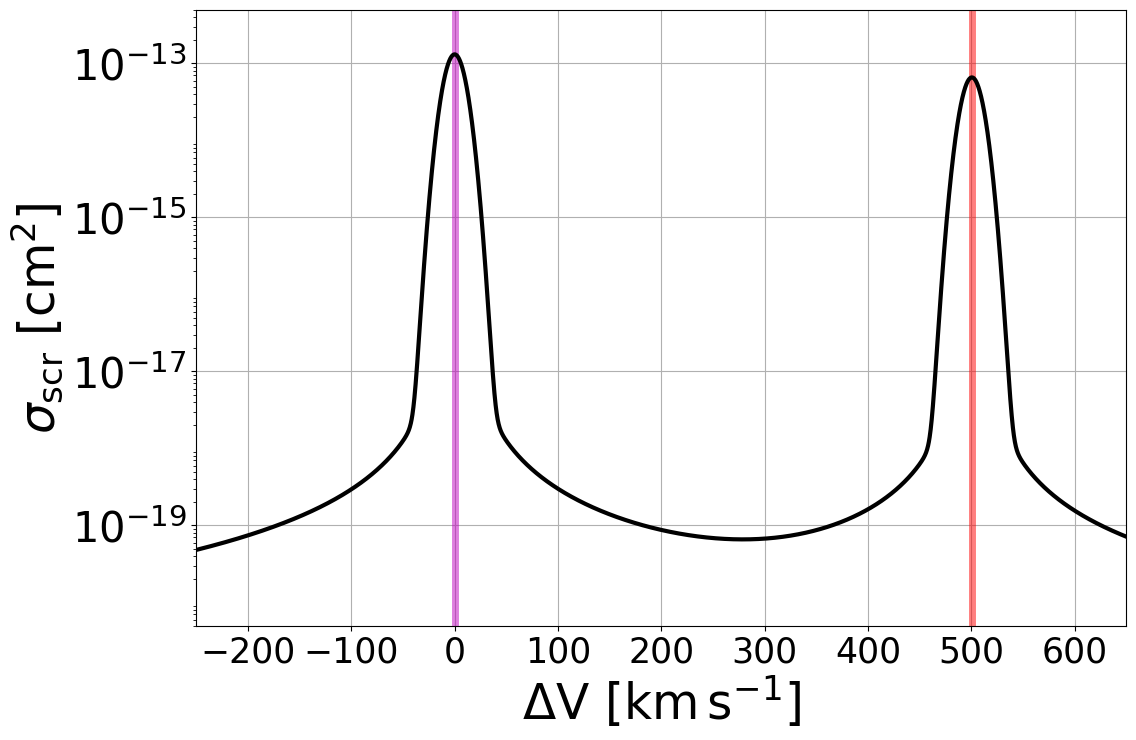

In [33]:
fig = plt.figure(1,figsize=(12,8))

# plt.plot(vel_x,cross_sec_1,'k:',alpha=1,lw=3,label=r'$\sigma_{\rm R} = 2.5 ~ [\rm km\,s^{-1}]$')
# plt.plot(vel_x, cross_sec_2, 'b-', markersize=0.5,label=r'30.0')
# plt.plot(vel_x, cross_sec_3, 'r-', markersize=0.5,label=r'50.0 ')
HH = (C_IV_H_A/ C_IV_K_A -1 ) *cc_k
plt.axvline(0,ymin=-1,ymax=1,linestyle='-',color='m',alpha=0.5,lw=5)
plt.axvline(HH,ymin=-1,ymax=1,linestyle='-',color='r',alpha=0.5,lw=5)
plt.yscale('log')
plt.plot(vel_x,cross_sec,'k-',lw=3,alpha=1,label=r'$ 11.8 $')
plt.xlim(-250,650)
plt.ylim(0.5e-20,5e-13)
plt.ylabel(r'$\sigma_{\rm scr} ~ [\rm cm^{2}]$',fontsize=35)
plt.xlabel(r'$\Delta \rm V ~ [\rm km \, s^{-1}]$',fontsize=35)
plt.yticks([10e-20,10e-18,10e-16,10e-14],fontsize=30)
plt.xticks(fontsize=25)
plt.grid(True)
# plt.legend(loc='upper right',fontsize=25 , title=r'$\sigma_R ~ [\rm km \, s^{-1}]$',title_fontsize=30)
plt.savefig('/home/jin/바탕화면/Scattering cross_section.pdf',bbox_inches='tight')

In [16]:
dx= 0.05
ii = np.where( (vel_x > 0-dx) & (vel_x < 0+dx) )[0]
jj = np.where( (vel_x > 500-dx) & (vel_x < 500+dx) )[0]
print(cross_sec[ii],cross_sec[jj])

[1.31202324e-13] [6.56893791e-14]


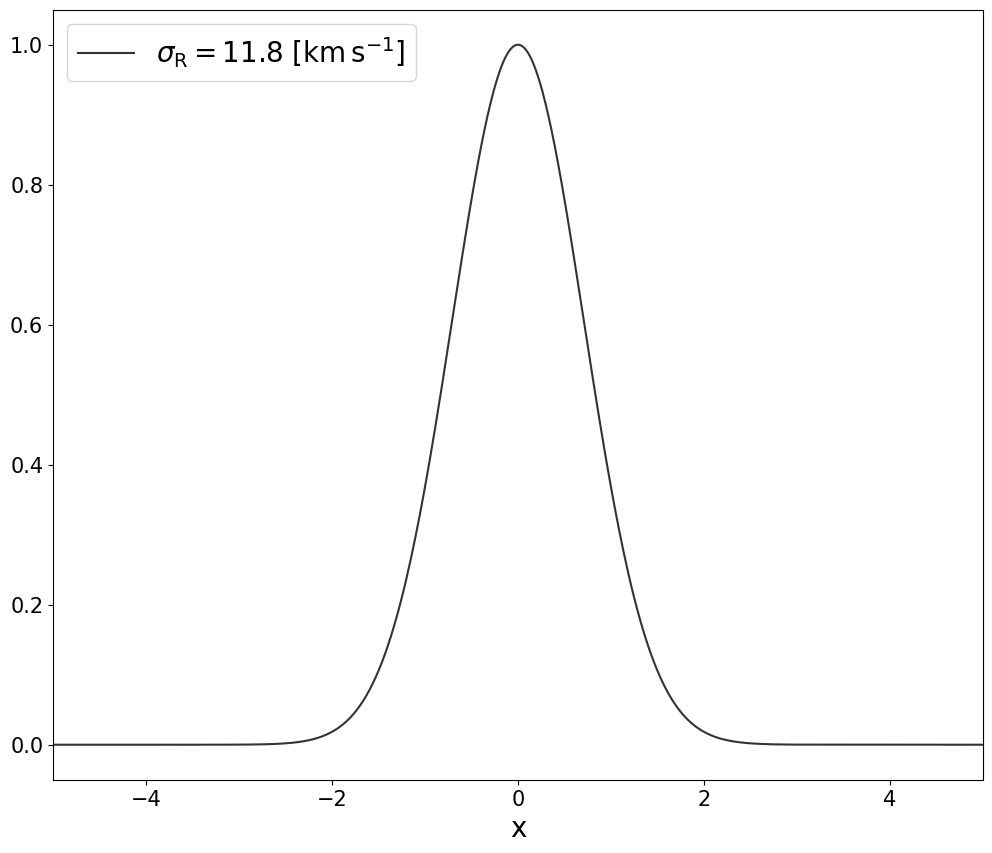

In [5]:
fig = plt.figure(1,figsize=(12,10))
# plt.plot(xx_H_2, voigt_H_2,'k:',alpha=1,lw=3,label=r'$\sigma_{\rm R} = 2.5 ~ [\rm km\,s^{-1}]$')
plt.plot(xx_K, voigt_K,'k-',alpha=0.8,label=r'$\sigma_{\rm R} = 11.8 ~ [\rm km\,s^{-1}]$')
# plt.plot(xx_K_2, voigt_K_2, 'b--', markersize=0.5,alpha=0.6,label=r'$\sigma_{\rm R} = 30.0 ~ [\rm km\,s^{-1}]$')
# plt.plot(xx_K_3, voigt_K_3, 'r--', markersize=0.5,alpha=0.5,label=r'$\sigma_{\rm R} = 50.0 ~ [\rm km\,s^{-1}]$')
plt.xlim(-5,5)
# plt.ylabel(r'$\sigma_{\rm scr} ~ [\rm cm^{2}]$',fontsize=20)
plt.xlabel(r'x',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc='upper left',fontsize=20)
# plt.savefig('/home/jin/바탕화면/voigt_profile_various_GR.pdf',bbox_inches='tight')

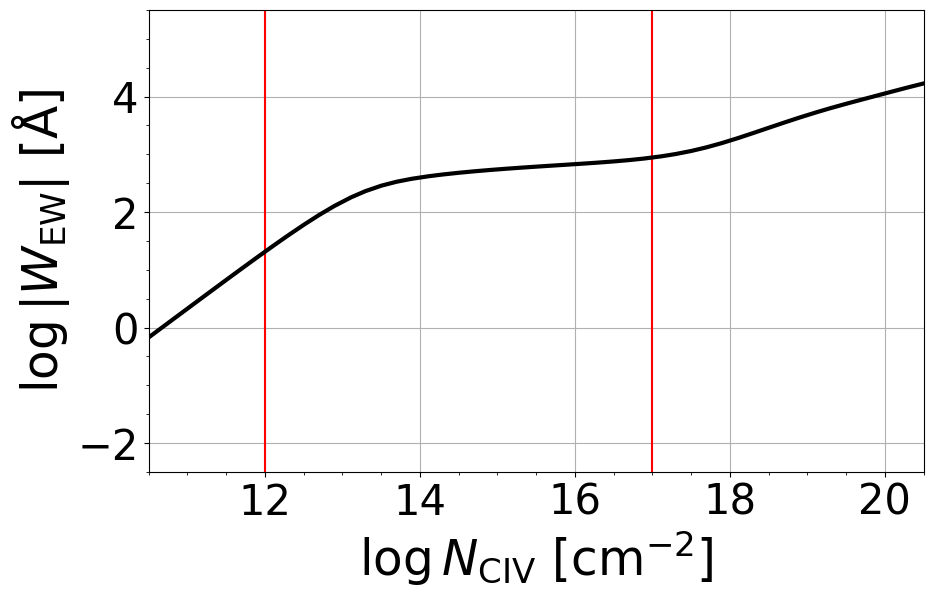

In [6]:
fig = plt.figure(1,figsize=(10,6))
rr = np.arange(3, 22, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

plt.axvline(12,ymin=-10,ymax=10,linestyle='-',color='r')
plt.axvline(17,ymin=-10,ymax=10,linestyle='-',color='r')
W = np.zeros(len(total_N_c))
W_1 = np.zeros(len(total_N_c))
W_2 = np.zeros(len(total_N_c))
for ii, n_civ in enumerate(total_N_c):
    tau = n_civ*cross_sec
    tau_1 = n_civ*cross_sec_1
    tau_2 = n_civ*cross_sec_2
    W[ii] = np.sum((1-np.exp(-tau)),0)
    # W_1[ii] = np.sum((1-np.exp(-tau_1)),0)
    # W_2[ii] = np.sum((1-np.exp(-tau_2)),0)


# plt.plot(np.log10(total_N_c),np.log10(W_2),'k:',lw=2,label=r'$\sigma_{\rm R} = 2.5 ~ [\rm km\,s^{-1}]$')
plt.plot(np.log10(total_N_c),np.log10(W),'k-',lw=3,label=r'$\sigma_{\rm R} = 11.8 ~ [\rm km\,s^{-1}]$')
# plt.plot(np.log10(total_N_c),np.log10(W_1),'k--',lw=2,label=r'$\sigma_{\rm R} = 50.0 ~ [\rm km\,s^{-1}]$')
# plt.legend(fontsize=15)
# plt.

plt.xlim(10.5,20.5)
plt.ylim(-2.5,5.5)
plt.yticks([-2,0,2,4],fontsize=30)
plt.xticks(fontsize=30)
plt.xlabel(r'$\log{N_{\rm CIV}}~[\rm cm^{-2}]$',fontsize=35)
plt.ylabel(r'$\log{|W_{\rm EW}|}~[\rm \AA]$',fontsize=35)
plt.minorticks_on()
plt.grid(True)

# plt.savefig('/home/jin/바탕화면/curve_of_growth.pdf',bbox_inches="tight")